In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import os.path as op
import shutil
from zipfile import ZipFile
from keras.preprocessing.image import array_to_img, img_to_array, load_img

Using TensorFlow backend.


### Loading images

In [2]:
from utils import get_image_paths, word_from_image_path, preprocess_image, print_im, TextTransform

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
images_paths = get_image_paths()

In [5]:
img = load_img(images_paths[0], grayscale=True)
img_array = img_to_array(img)

# Pre-processing

In [6]:
im = preprocess_image(img_array)

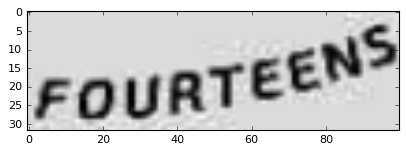

In [7]:
print_im(im)

#### Extracting names

In [12]:
images = get_image_paths()[:10]

In [13]:
text_transformer = TextTransform()

In [15]:
batch_y = text_transformer.make_batch_labels(images)

In [16]:
ims = [load_img(im, grayscale=True) for im in images]

In [17]:
ims = [preprocess_image(img_to_array(im)) for im in ims]

In [18]:
batch = np.array(ims)

### Model creation

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Reshape, Activation
from keras.layers import Flatten

In [20]:
N_CHARS = 37
SEQUENCE_LENGTH = 23

In [22]:
for a, b in zip(('a', 'a'), ('b', 'd')):
    print(a, b)

a b
a d


In [23]:
convolutions = [64, 128, 256, 512, 512]
kernels = [5, 5, 3, 3, 3]

model = Sequential()
input_shape = (10, 32, 100, 1)

model.add(Conv2D(nb_filter=64,
                     nb_row=kernels[0],
                     nb_col=kernels[0],
                     activation='relu',
                     border_mode='same',
                     batch_input_shape=input_shape, name="convo" + str(0)))

for i, (kernel, convolution_size) in enumerate(zip(convolutions[1:], kernels[1:])):
    model.add(Conv2D(nb_filter=convolution_size,
                     nb_row=kernel,
                     nb_col=kernel,
                     activation='relu',
                     border_mode='same',
                     name="convo" + str(i + 1)))
    
    if i <= 3 :
        model.add(MaxPooling2D(pool_size=(2, 2), border_mode='same',))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))

model.add(Dense(SEQUENCE_LENGTH * N_CHARS))

model.add(Reshape((SEQUENCE_LENGTH, N_CHARS)))
model.add(Activation('softmax'))


model.compile(optimizer='adam',
      loss='mae')

In [24]:
res = model.predict(batch.reshape((10, 32, 100, 1)))

In [70]:
y = np.random.randn(4096 * 10).reshape((10, 4096))

In [ ]:
model.fit(batch.reshape((10, 32, 100, 1)), batch_y)

Epoch 1/10
